Romaisa Nadeem - Assignment 2

---


Statistics for Data Science - 1251

## Assignment 2

This assignmemt is based on content discussed in module 2 and will work on a solution for the famous Monty Hall game.  Retrieved from https://en.wikipedia.org/wiki/Monty_Hall_problem


## Learning outcomes

- Program a simple simulation to solve a concrete statistical problem
- Develop insight into the Bayesian probabilistic viewpoint
- Recognize that statistical intuition can sometimes be wrong


**Question**

Given below is the description of the problem.  

Suppose you're on a game show and you're given the choice of three doors.

Behind one door is a car; behind the others, goats. The car and the goats were placed randomly behind the doors before the show.

The rules are:

After you have chosen a door, the door remains closed for the time being.
The game show host, Monty Hall, who knows what is behind the doors, now has to open one of the two remaining doors, and the door he opens must have a goat behind it. If both remaining doors have goats behind them, he chooses one randomly.

After Monty opens a door with a goat, he will ask you to decide whether you want to stay with your first choice or to switch to the last remaining door.
Imagine that you chose Door 1 and the host opens Door 3, which has a goat.
He then asks you "Do you want to switch to Door Number 2?" Is it to your advantage to change your choice?

**NOTES:**
1. The player may initially choose any of the three doors (not just Door 1).
2. The host opens a different door revealing a goat (not necessarily Door 3).
3. The host gives the player a second choice between the two remaining unopened doors.


![download.jpeg](attachment:download.jpeg)

(Source: https://en.wikipedia.org/wiki/Monty_Hall_problem#)

- Write Python code to solve the Monty Hall problem. Simulate at least a thousand games using three doors for each strategy and show the results in such a way as to make it easy to compare the effects of each strategy.


In [4]:
import random

def simulate_monty_hall(num_simulations):
    stay_wins = 0
    switch_wins = 0

    for _ in range(num_simulations):
        car = random.randint(0, 2)
        initial_choice = random.randint(0, 2)

        # Host's door (must be a goat and not the initial choice)
        remaining_doors = [door for door in [0, 1, 2] if door != initial_choice]
        possible_host_doors = [door for door in remaining_doors if door != car]
        host_open = random.choice(possible_host_doors)

        # Determine the switch door (remaining unopened door)
        switch_door = [door for door in [0, 1, 2] if door != initial_choice and door != host_open][0]

        # Outcomes check
        if initial_choice == car:
            stay_wins += 1
        if switch_door == car:
            switch_wins += 1

    return stay_wins, switch_wins

# Running simulation
num_simulations = 1000
stay, switch = simulate_monty_hall(num_simulations)

print(f"After {num_simulations} simulations:")
print(f"Staying strategy wins: {stay} times ({stay/num_simulations:.1%})")
print(f"Switching strategy wins: {switch} times ({switch/num_simulations:.1%})")

After 1000 simulations:
Staying strategy wins: 349 times (34.9%)
Switching strategy wins: 651 times (65.1%)


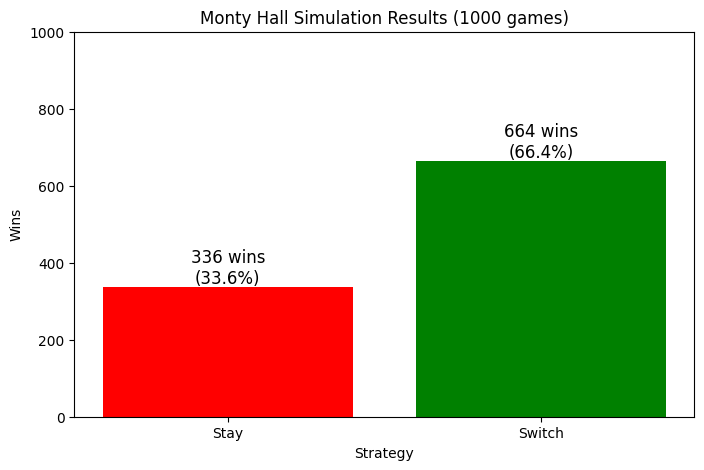

In [5]:
import matplotlib.pyplot as plt

# Visualization Data
strategies = ["Stay", "Switch"]
win_counts = [stay_wins, switch_wins]

# Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(strategies, win_counts, color=["red", "green"])
plt.xlabel("Strategy")
plt.ylabel("Wins")
plt.title(f"Monty Hall Simulation Results ({num_simulations} games)")
plt.ylim(0, num_simulations)
plt.text(0, stay_wins + 10, f"{stay_wins} wins\n({stay_wins/num_simulations:.1%})", ha="center", fontsize=12)
plt.text(1, switch_wins + 10, f"{switch_wins} wins\n({switch_wins/num_simulations:.1%})", ha="center", fontsize=12)
plt.show()
